In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

sns.set(style="whitegrid")



In [3]:
materials = pd.read_csv("data/processed/materials_final.csv")
products = pd.read_csv("data/processed/products_final.csv")

display(materials.head())
display(products.head())



,material_id,material_name,strength_rating,weight_capacity_kg,biodegradability_score,recyclability_percent,co2_emission_score,cost_per_kg
0,1,Paperboard,7,5.0,85,90,1.2,45
1,2,Corrugated Cardboard,9,15.0,70,80,1.6,55
2,3,Bagasse (Sugarcane Fiber),6,4.0,95,100,0.4,50
3,4,Cornstarch Polymer,5,3.0,98,100,0.6,60
4,5,PLA Bioplastic,8,8.0,80,90,1.8,75


,product_id,product_name,category,weight_kg,fragility_level,temperature_sensitive
0,1,Chocolate Bar,Confectionery,0.10,2,Yes
1,2,Milk Bottle (1L),Dairy,1.00,6,Yes
2,3,Egg Carton (12),Dairy,0.80,10,No
3,4,Potato Chips Bag,Snacks,0.15,3,No
4,5,Glass Ketchup Bottle,Condiments,0.90,9,No


In [ ]:
# =============================================================
# CELL 3 — HANDLE MISSING VALUES (Cleaning)
# =============================================================

# Replace "-" or empty strings with NaN in materials
materials = materials.replace("-", np.nan)

# Columns that should be numeric
numeric_cols = [
    'strength_rating', 'weight_capacity_kg', 'biodegradability_score',
    'recyclability_percent', 'co2_emission_score', 'cost_per_kg'
]

# Convert numeric columns to float
for col in numeric_cols:
    materials[col] = pd.to_numeric(materials[col], errors="coerce")

# Fill missing numeric values with mean
materials[numeric_cols] = materials[numeric_cols].fillna(materials[numeric_cols].mean())

# Fill missing categorical values
materials['material_name'] = materials['material_name'].fillna("Unknown")

# Clean product dataset
products["temperature_sensitive"] = products["temperature_sensitive"].map({"Yes": 1, "No": 0})
products["category"] = products["category"].fillna("Unknown")

print("=== Missing Values After Cleaning ===")
print("\nMaterials:")
display(materials.isnull().sum())

print("\nProducts:")
display(products.isnull().sum())


=== Missing Values After Cleaning ===

Materials:


material_id               0
material_name             0
strength_rating           0
weight_capacity_kg        0
biodegradability_score    0
recyclability_percent     0
co2_emission_score        0
cost_per_kg               0
dtype: int64


Products:


product_id               0
product_name             0
category                 0
weight_kg                0
fragility_level          0
temperature_sensitive    0
dtype: int64

In [5]:
# =============================================================
# CELL 4 — NORMALIZATION + ENCODING
# =============================================================

# Normalize numerical values (0–1 scale)
scaler = MinMaxScaler()
materials_scaled = materials.copy()
materials_scaled[numeric_cols] = scaler.fit_transform(materials[numeric_cols])

print("=== MATERIALS AFTER NORMALIZATION ===")
display(materials_scaled.head())

# Encode material_name (Label Encoding)
label_encoder = LabelEncoder()
materials_scaled["material_name_encoded"] = label_encoder.fit_transform(materials_scaled["material_name"])

# One-Hot Encode category in products
products_encoded = pd.get_dummies(products, columns=["category"], prefix="cat")

print("=== MATERIALS ENCODED ===")
display(materials_scaled.head())

print("=== PRODUCTS ENCODED ===")
display(products_encoded.head())


=== MATERIALS AFTER NORMALIZATION ===


,material_id,material_name,strength_rating,weight_capacity_kg,biodegradability_score,recyclability_percent,co2_emission_score,cost_per_kg
0,1,Paperboard,0.625,0.125,0.851064,0.5,0.115578,0.290541
1,2,Corrugated Cardboard,0.875,0.375,0.691489,0.0,0.155779,0.358108
2,3,Bagasse (Sugarcane Fiber),0.500,0.100,0.957447,1.0,0.035176,0.324324
3,4,Cornstarch Polymer,0.375,0.075,0.989362,1.0,0.055276,0.391892
4,5,PLA Bioplastic,0.750,0.200,0.797872,0.5,0.175879,0.493243


=== MATERIALS ENCODED ===


,material_id,material_name,strength_rating,weight_capacity_kg,biodegradability_score,recyclability_percent,co2_emission_score,cost_per_kg,material_name_encoded
0,1,Paperboard,0.625,0.125,0.851064,0.5,0.115578,0.290541,55
1,2,Corrugated Cardboard,0.875,0.375,0.691489,0.0,0.155779,0.358108,27
2,3,Bagasse (Sugarcane Fiber),0.500,0.100,0.957447,1.0,0.035176,0.324324,2
3,4,Cornstarch Polymer,0.375,0.075,0.989362,1.0,0.055276,0.391892,25
4,5,PLA Bioplastic,0.750,0.200,0.797872,0.5,0.175879,0.493243,43


=== PRODUCTS ENCODED ===


,product_id,product_name,weight_kg,fragility_level,temperature_sensitive,cat_ B-everages,cat_ Bakery,cat_ Beverages,cat_ Dairy,cat_Bakery,...,cat_Pantry,cat_Prepared Beverage,cat_Prepared Food,cat_Produce,cat_Protein,cat_Seafood,cat_Snacks,cat_Spices,cat_Spotlight,cat_Staples
0,1,Chocolate Bar,0.10,2,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Milk Bottle (1L),1.00,6,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Egg Carton (12),0.80,10,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Potato Chips Bag,0.15,3,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,5,Glass Ketchup Bottle,0.90,9,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# =============================================================
# CELL 5A — DATASET OVERVIEW
# =============================================================

print("===== MATERIALS DATASET SHAPE =====")
print(materials.shape)

print("\n===== PRODUCTS DATASET SHAPE =====")
print(products.shape)

print("\n===== MATERIALS COLUMNS =====")
display(materials.columns)

print("\n===== PRODUCTS COLUMNS =====")
display(products.columns)

print("\n===== SAMPLE MATERIALS =====")
display(materials.head())

print("\n===== SAMPLE PRODUCTS =====")
display(products.head())


===== MATERIALS DATASET SHAPE =====
(80, 8)

===== PRODUCTS DATASET SHAPE =====
(300, 6)

===== MATERIALS COLUMNS =====


Index(['material_id', 'material_name', 'strength_rating', 'weight_capacity_kg',
       'biodegradability_score', 'recyclability_percent', 'co2_emission_score',
       'cost_per_kg'],
      dtype='object')


===== PRODUCTS COLUMNS =====


Index(['product_id', 'product_name', 'category', 'weight_kg',
       'fragility_level', 'temperature_sensitive'],
      dtype='object')


===== SAMPLE MATERIALS =====


,material_id,material_name,strength_rating,weight_capacity_kg,biodegradability_score,recyclability_percent,co2_emission_score,cost_per_kg
0,1,Paperboard,7,5.0,85,90,1.2,45
1,2,Corrugated Cardboard,9,15.0,70,80,1.6,55
2,3,Bagasse (Sugarcane Fiber),6,4.0,95,100,0.4,50
3,4,Cornstarch Polymer,5,3.0,98,100,0.6,60
4,5,PLA Bioplastic,8,8.0,80,90,1.8,75



===== SAMPLE PRODUCTS =====


,product_id,product_name,category,weight_kg,fragility_level,temperature_sensitive
0,1,Chocolate Bar,Confectionery,0.10,2,1
1,2,Milk Bottle (1L),Dairy,1.00,6,1
2,3,Egg Carton (12),Dairy,0.80,10,0
3,4,Potato Chips Bag,Snacks,0.15,3,0
4,5,Glass Ketchup Bottle,Condiments,0.90,9,0


In [14]:
# =============================================================
# CELL 5B — SUMMARY STATISTICS
# =============================================================

print("===== MATERIALS SUMMARY =====")
display(materials.describe().T)

print("===== PRODUCTS SUMMARY =====")
display(products.describe().T)


===== MATERIALS SUMMARY =====


,count,mean,std,min,25%,50%,75%,max
material_id,80.0,40.500000,23.237900,1.00,20.75,40.5,60.25,80.0
strength_rating,80.0,6.550000,1.792389,2.00,5.00,6.0,8.00,10.0
weight_capacity_kg,80.0,8.041875,7.934313,0.00,3.00,5.5,10.00,40.0
biodegradability_score,80.0,79.987500,26.329698,5.00,82.00,90.0,95.00,99.0
recyclability_percent,80.0,96.362500,5.082220,80.00,95.00,100.0,100.00,100.0
co2_emission_score,80.0,1.315375,1.473105,0.05,0.50,0.9,1.60,10.0
cost_per_kg,80.0,69.637500,27.343221,2.00,58.00,69.0,82.00,150.0


===== PRODUCTS SUMMARY =====


,count,mean,std,min,25%,50%,75%,max
product_id,300.0,150.500000,86.746758,1.000,75.75,150.5,225.25,300.0
weight_kg,300.0,0.504933,0.440823,0.005,0.25,0.4,0.60,5.0
fragility_level,300.0,4.340000,2.654787,1.000,2.00,4.0,6.00,10.0
temperature_sensitive,300.0,0.430000,0.495903,0.000,0.00,0.0,1.00,1.0


In [15]:
materials_skew = materials[numeric_cols].skew()
materials_kurt = materials[numeric_cols].kurtosis()

print("===== MATERIALS SKEWNESS =====")
display(materials_skew)

print("\n===== MATERIALS KURTOSIS =====")
display(materials_kurt)


===== MATERIALS SKEWNESS =====


strength_rating           0.099022
weight_capacity_kg        2.035857
biodegradability_score   -1.957471
recyclability_percent    -1.436447
co2_emission_score        3.348933
cost_per_kg               0.218082
dtype: float64


===== MATERIALS KURTOSIS =====


strength_rating           -0.193839
weight_capacity_kg         4.443930
biodegradability_score     2.490543
recyclability_percent      1.481499
co2_emission_score        15.363362
cost_per_kg                1.479905
dtype: float64

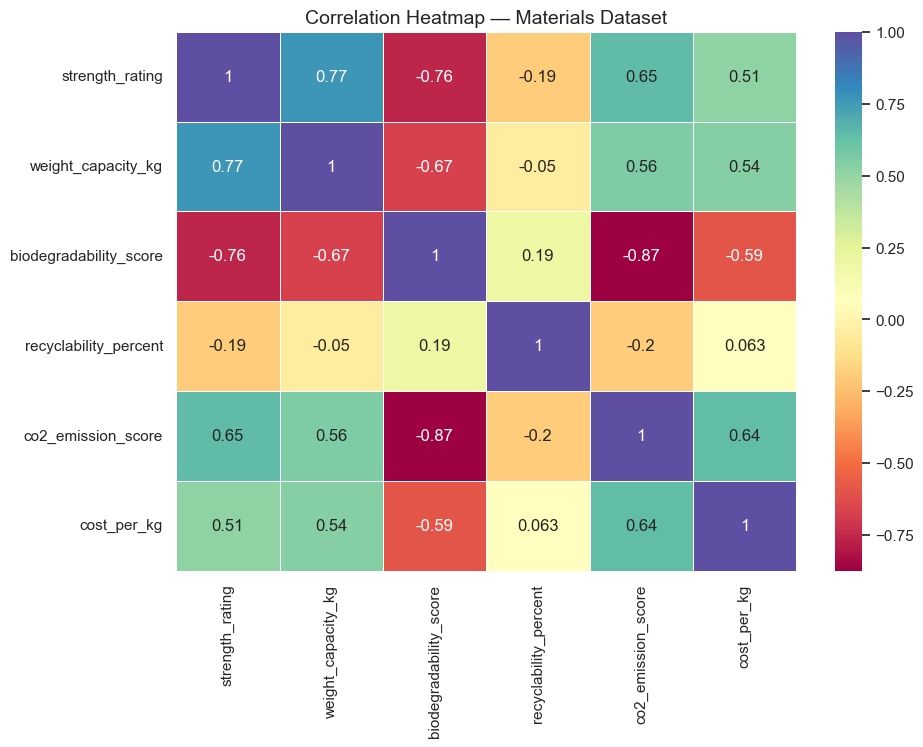

In [16]:
# =============================================================
# CELL 5C — MATERIALS CORRELATION HEATMAP
# =============================================================

plt.figure(figsize=(10,7))
sns.heatmap(materials[numeric_cols].corr(), annot=True, cmap="Spectral", linewidths=0.5)
plt.title("Correlation Heatmap — Materials Dataset", fontsize=14)
plt.show()


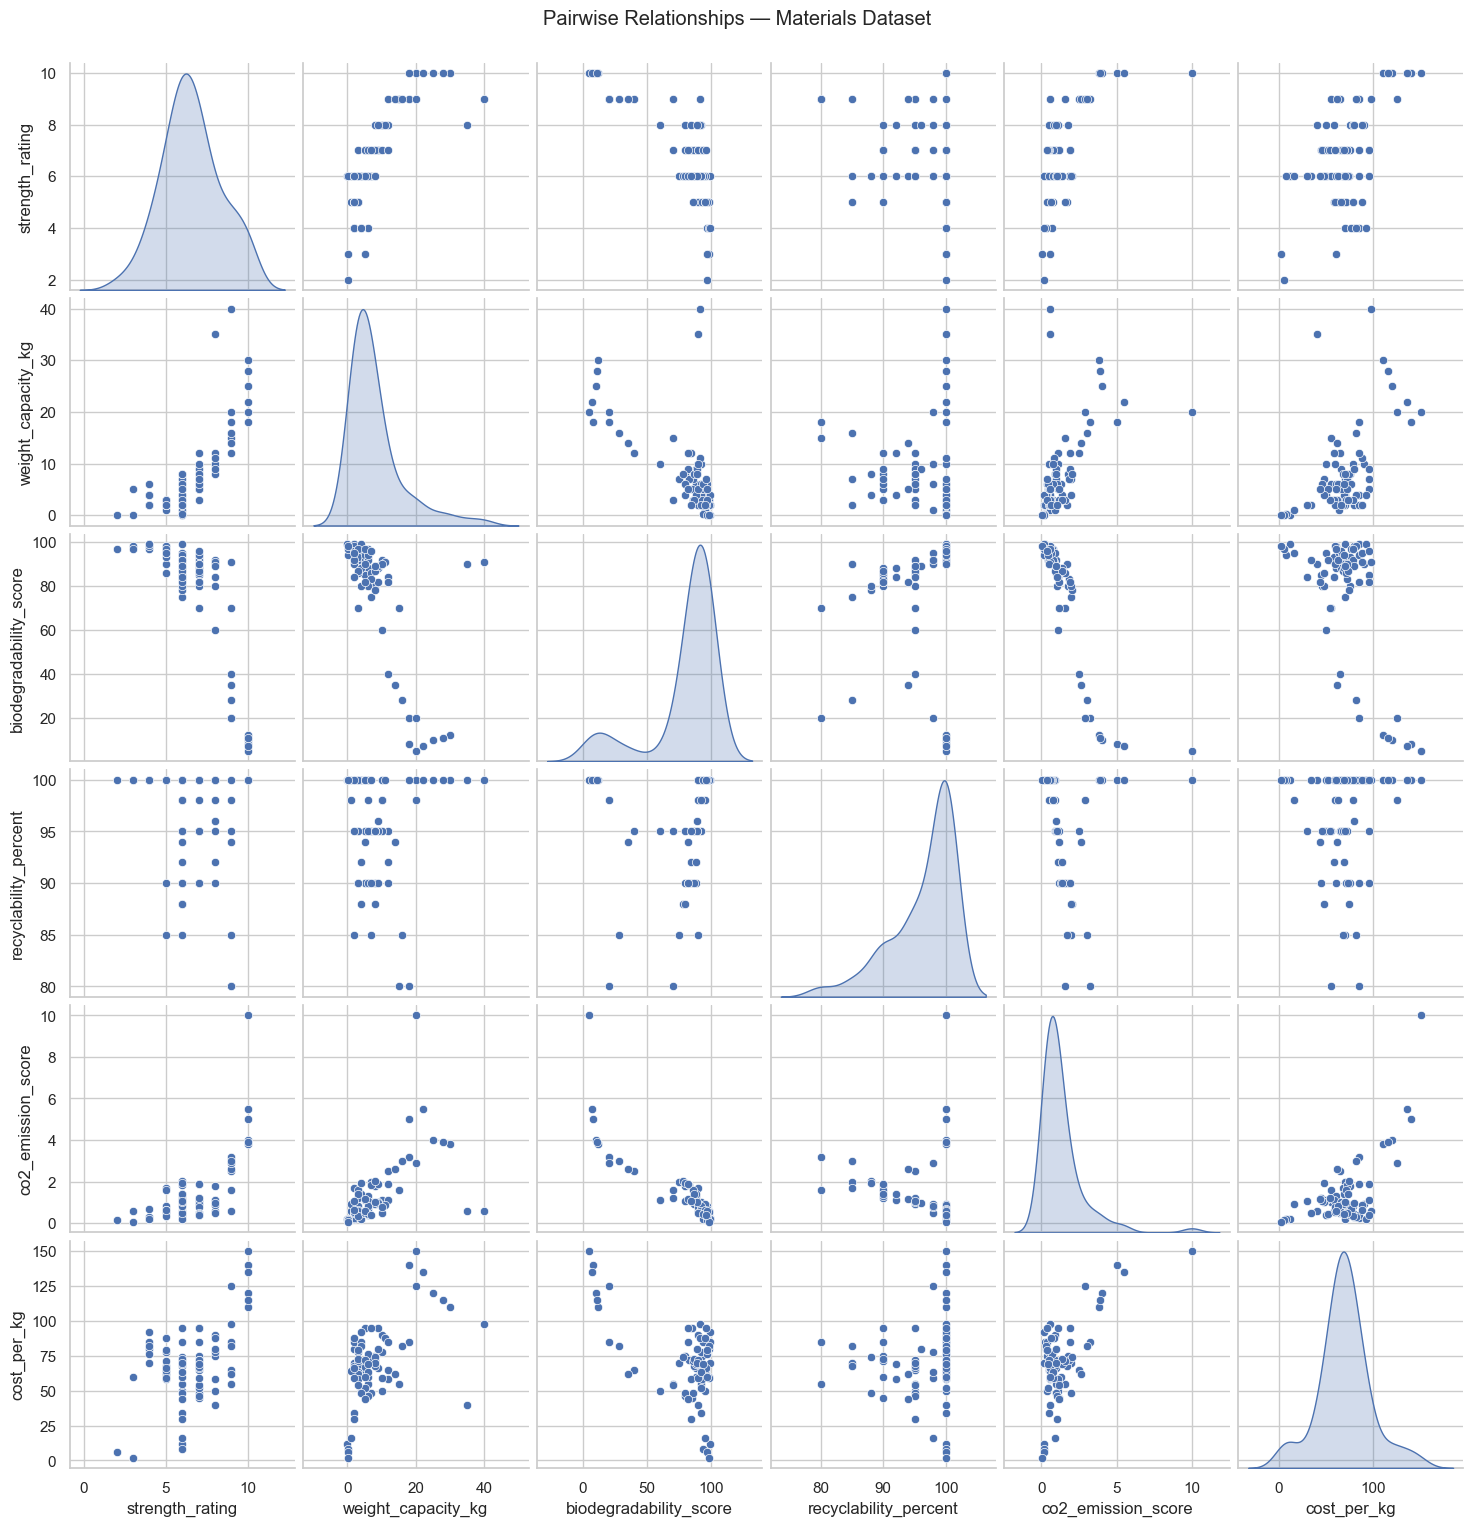

In [17]:
# =============================================================
# CELL 5D — PAIRPLOT FOR MATERIAL NUMERICAL FEATURES
# =============================================================

sns.pairplot(materials[numeric_cols], diag_kind="kde")
plt.suptitle("Pairwise Relationships — Materials Dataset", y=1.02)
plt.show()


<Figure size 1200x600 with 0 Axes>

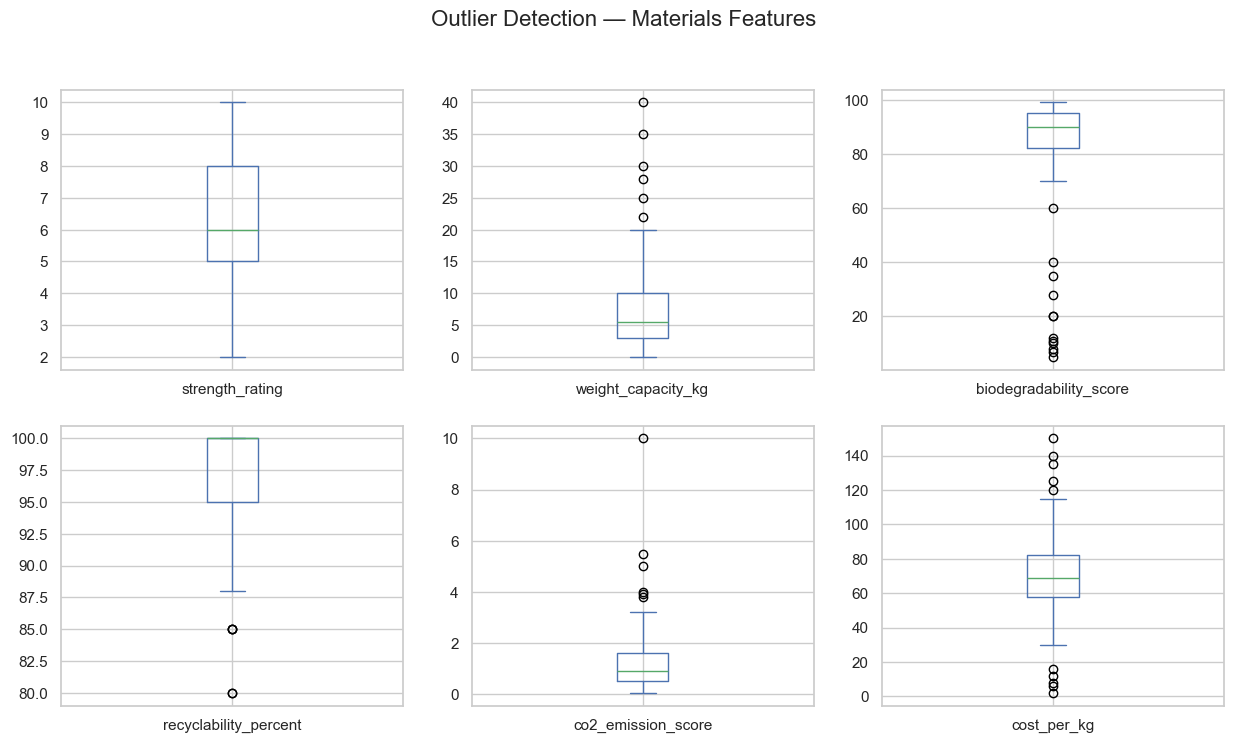

In [18]:
# =============================================================
# CELL 5E — BOX PLOTS FOR OUTLIERS
# =============================================================

plt.figure(figsize=(12,6))
materials[numeric_cols].plot(kind="box", subplots=True, layout=(2,3),
                             figsize=(15,8), sharex=False, sharey=False)
plt.suptitle("Outlier Detection — Materials Features", fontsize=16)
plt.show()


In [4]:
# =============================================================
# FULL OUTLIER DETECTION (IQR METHOD)
# =============================================================

import pandas as pd
import numpy as np

# -------------------------------------------------------------
# 1. LOAD DATASETS
# -------------------------------------------------------------
materials = pd.read_csv("data/processed/materials_final.csv")
products = pd.read_csv("data/processed/products_final.csv")

print("Datasets loaded successfully!")

# -------------------------------------------------------------
# 2. DEFINE NUMERIC COLUMNS FOR MATERIALS
# -------------------------------------------------------------
numeric_cols = [
    'strength_rating',
    'weight_capacity_kg',
    'biodegradability_score',
    'recyclability_percent',
    'co2_emission_score',
    'cost_per_kg'
]

# -------------------------------------------------------------
# 3. OUTLIER COUNT FUNCTION USING IQR
# -------------------------------------------------------------
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = series[(series < lower) | (series > upper)]
    return len(outliers)

# -------------------------------------------------------------
# 4. COUNT OUTLIERS FOR EACH MATERIAL FEATURE
# -------------------------------------------------------------
outlier_summary = {}

for col in numeric_cols:
    outlier_summary[col] = count_outliers(materials[col])

# -------------------------------------------------------------
# 5. PRINT OUTLIER COUNTS
# -------------------------------------------------------------
print("\n=== OUTLIER COUNT PER MATERIAL FEATURE ===")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

# -------------------------------------------------------------
# 6. OPTIONAL — SHOW AS TABLE
# -------------------------------------------------------------
outlier_table = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print("\n=== OUTLIER TABLE ===")
display(outlier_table)


Datasets loaded successfully!

=== OUTLIER COUNT PER MATERIAL FEATURE ===
strength_rating: 0 outliers
weight_capacity_kg: 6 outliers
biodegradability_score: 12 outliers
recyclability_percent: 5 outliers
co2_emission_score: 6 outliers
cost_per_kg: 10 outliers

=== OUTLIER TABLE ===


,Outlier Count
strength_rating,0
weight_capacity_kg,6
biodegradability_score,12
recyclability_percent,5
co2_emission_score,6
cost_per_kg,10


C:\Users\Kavita\AppData\Local\Temp\ipykernel_23868\667349390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="category", data=products, palette="viridis")


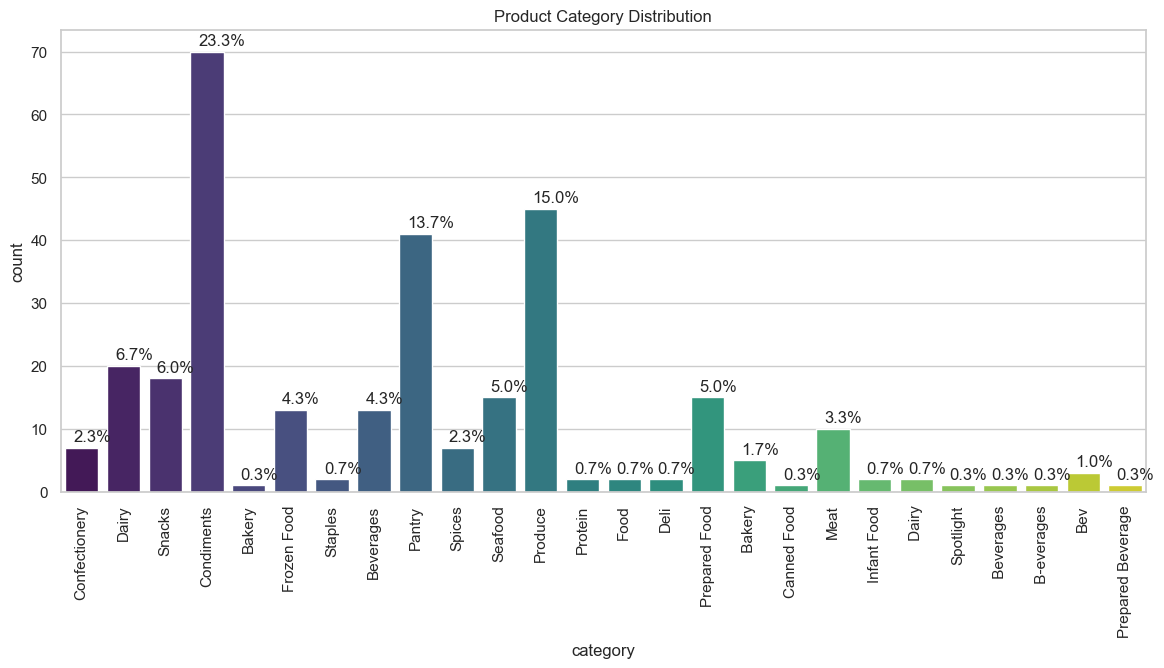

In [19]:
# =============================================================
# CELL 5F — PRODUCT CATEGORY DISTRIBUTION
# =============================================================

plt.figure(figsize=(14,6))
ax = sns.countplot(x="category", data=products, palette="viridis")
plt.xticks(rotation=90)
plt.title("Product Category Distribution")

# add percentage labels
total = len(products)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height()+1))

plt.show()


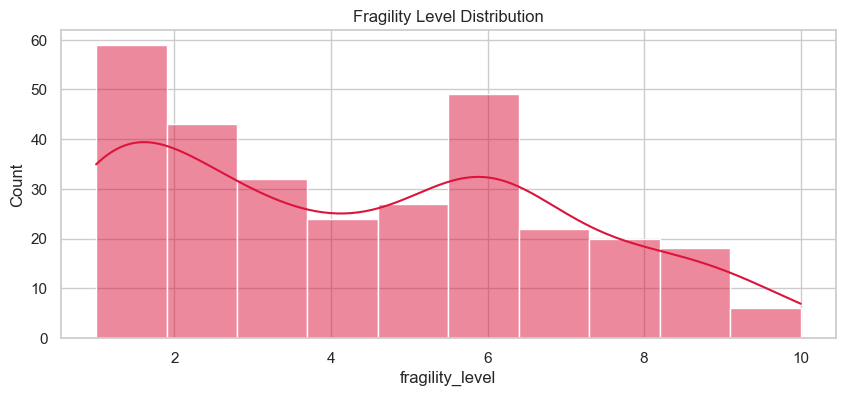

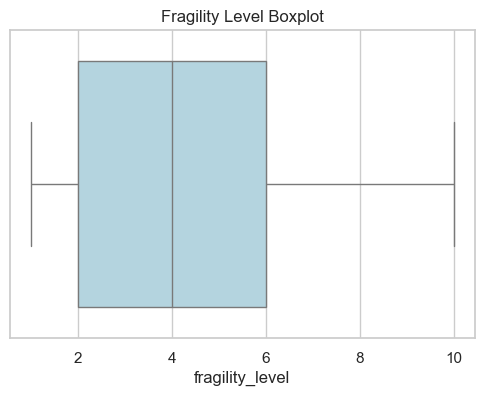

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(products["fragility_level"], kde=True, color="crimson")
plt.title("Fragility Level Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=products["fragility_level"], color="lightblue")
plt.title("Fragility Level Boxplot")
plt.show()


In [21]:
print("\n🎯 KEY INSIGHTS FROM ADVANCED EDA\n")

print("1️⃣ Eco-Friendly Materials (Lowest CO₂):")
display(materials.nsmallest(5, "co2_emission_score"))

print("\n2️⃣ Strongest Materials (Top Strength Rating):")
display(materials.nlargest(5, "strength_rating"))

print("\n3️⃣ Fragile Food Items Requiring Strong Packaging:")
display(products.nlargest(5, "fragility_level"))

print("\n4️⃣ Heaviest Items Requiring High Weight-Capacity Packaging:")
display(products.nlargest(5, "weight_kg"))

print("\n5️⃣ Categories with Most Products:")
display(products['category'].value_counts().head())

print("\n💡 SUMMARY OF FINDINGS:")
print("""
• Majority of eco materials have very high biodegradability (80–99%) and recyclability (95–100%).
• CO₂ emission score is inversely related to biodegradability — more eco materials emit less carbon.
• Strongest materials are aluminum and glass-based; ideal for fragile and heavy food products.
• Produce, Condiments, and Dairy categories dominate the dataset, indicating wide variety.
• About 43% of products are temperature-sensitive and need packaging that maintains freshness.
• Fragility levels vary widely (1–10), indicating need for adaptive packaging recommendations.
""")



🎯 KEY INSIGHTS FROM ADVANCED EDA

1️⃣ Eco-Friendly Materials (Lowest CO₂):


,material_id,material_name,strength_rating,weight_capacity_kg,biodegradability_score,recyclability_percent,co2_emission_score,cost_per_kg
74,75,Bamboo Toothpick Divider,3,0.05,98,100,0.05,2
59,60,Compostable Paper Straw,2,0.10,97,100,0.15,6
58,59,Mycelium Insulation Block,4,4.00,99,100,0.18,92
6,7,Mushroom Packaging,4,2.00,99,100,0.20,70
45,46,Compostable Adhesive (natural),6,0.00,99,100,0.20,12



2️⃣ Strongest Materials (Top Strength Rating):


,material_id,material_name,strength_rating,weight_capacity_kg,biodegradability_score,recyclability_percent,co2_emission_score,cost_per_kg
8,9,Aluminum Foil,10,20.0,5,100,10.0,150
9,10,Glass Jar (Reusable),10,25.0,10,100,4.0,120
16,17,Recycled Aluminum,10,18.0,8,100,5.0,140
23,24,Recycled Glass,10,30.0,12,100,3.8,110
48,49,Recycled Aluminum Tray (lightweight),10,22.0,7,100,5.5,135



3️⃣ Fragile Food Items Requiring Strong Packaging:


,product_id,product_name,category,weight_kg,fragility_level,temperature_sensitive
2,3,Egg Carton (12),Dairy,0.80,10,0
64,65,Fresh Oysters Pack (500g),Seafood,0.50,10,1
115,116,Glass Canning Jar (1L),Pantry,1.00,10,0
124,125,Fresh Duck Eggs (6),Dairy,0.90,10,1
256,257,Fresh Caviar Tin (small),Seafood,0.05,10,1



4️⃣ Heaviest Items Requiring High Weight-Capacity Packaging:


,product_id,product_name,category,weight_kg,fragility_level,temperature_sensitive
19,20,Rice Bag (5kg),Staples,5.0,1,0
61,62,Bulk Sugar Bag (2kg),Pantry,2.0,1,0
68,69,Pasteurized Cheese Wheel (2kg),Dairy,2.0,4,1
87,88,Bulk Lentils Bag (2kg),Pantry,2.0,1,0
112,113,Organic Fresh Milk (2L),Dairy,2.0,6,1



5️⃣ Categories with Most Products:


category
Condiments    70
Produce       45
Pantry        41
Dairy         20
Snacks        18
Name: count, dtype: int64


💡 SUMMARY OF FINDINGS:

• Majority of eco materials have very high biodegradability (80–99%) and recyclability (95–100%).
• CO₂ emission score is inversely related to biodegradability — more eco materials emit less carbon.
• Strongest materials are aluminum and glass-based; ideal for fragile and heavy food products.
• Produce, Condiments, and Dairy categories dominate the dataset, indicating wide variety.
• About 43% of products are temperature-sensitive and need packaging that maintains freshness.
• Fragility levels vary widely (1–10), indicating need for adaptive packaging recommendations.

